In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
df_returns = pd.read_csv('Datasets\Top 11 NASDAQ Stocks.csv', parse_dates = True, index_col = 'Date')
df_returns.drop(columns = ['Unnamed: 0'], inplace = True)
df_returns.index = df_returns.index.strftime('%Y-%m-%d')
MSFT = pd.DataFrame(df_returns.loc[df_returns['Instrument'] == 'MSFT.O', 'Price Close'])
TSLA = pd.DataFrame(df_returns.loc[df_returns['Instrument'] == 'TSLA.O', 'Price Close'])
NVDA = pd.DataFrame(df_returns.loc[df_returns['Instrument'] == 'NVDA.O', 'Price Close'])

### Subplots and Tick Params (non-datetime)

In [ ]:

''' 
Subplots 
    1. Format axis
    -   ticks, ticks label for x,y axis 
    -   % label for each bar -> for loop iterate over ax object then use ax.text()
            - set x-axis position using get_x() and get_width()
            - set y-axis using get_height()
            - number to display also use get_height()
            - set alignment, ha= , va= 
'''

fig, axs = plt.subplots(nrows = 2, ncols = 2,
                        sharex = False, # Tick labels only shown for one plot
                        sharey = False, # Use tick_params to turn subplots ticklabels on
                        figsize = (12, 6))

# Plot inside the axis at x = 0, y = 0 
axs[0, 0].plot( [1,2,3,4,5],
                [10, 12, 0, -5, 16],
                marker = 'o'
                )

axs[0, 1].plot( [10, 12, 0, -5, 16],
                marker = 'o'
                )

axs[1, 0].plot( [10, 12, 0, -5, 16],
                marker = 'o'
                )

axs[1, 1].plot( [10, 12, 0, -5, 16],
                marker = 'o'
                )


# Set tick labels in two ways
axs[0,1].set_xticks([1,2,3,4,5])
axs[0, 1].set_xticklabels(['A', 'B', 'C', 'D', 'E'],
                            fontsize = 15,
                            rotation = 45)

axs[0, 0].tick_params(
    axis = 'x', # Can be x, y or both
    which = 'major', # Major, minor or both
    labelsize = 10,
    labelrotation = 45,
    width = 1, # width of tick labels
    colors = 'red', # make sure you specify colors not color
    pad = 4 # spacing in points between tick and label
)

# Set Labels and Titles
axs[0,0].set_title(
    'Title of ax[0,0] Plot',
    fontsize = 20,
    fontstyle = 'italic',
    color = 'darkred'
)

axs[0,0].set_xlabel(
    'X label name', # Label Name
    fontsize = 16,
    fontweight = 'bold',
    color = 'darkblue'
    )   

from matplotlib.ticker import MultipleLocator, FormatStrFormatter, AutoMinorLocator

# Major ticks and mior ticks
axs[0,0].xaxis.set_major_locator(
    MultipleLocator(1.0) # Locates the major tick for 1 unit on x axis
                )

axs[0,0].xaxis.set_minor_locator(
    MultipleLocator(0.25) # Locates minor tick as 0.25 per unit 
                )

# Can Use AutoMinorLocator() which lets matplotlib do minor ticks automatically
axs[0,1].yaxis.set_minor_locator(
    AutoMinorLocator(n=3) # Automatically splits each major axis into 3 (on Y axis)
                )

# Set Y axis minor ticks to big and green
axs[0,1].tick_params(
    axis = 'y',
    which = 'minor',
    length = 8,
    width = 2,
    colors = 'green'
                )

# Legends
legend = axs[1,0].legend(
    loc = 'upper right',
    fontsize = 12,
    title = 'Title of Legend in Ax[1,0]',   # Title of the legend
    title_fontsize = 14,
    frameon = True,                         # Frame around legend box
    shadow = True,                          # Shadow around legend box
    facecolor = 'yellow',                   # Color of Legend Box
    edgecolor = 'red',
    markerscale = 1.5
)

# Can modify legend by calling methods on the legend object created
legend.get_title().set_fontsize(15)

fig.tight_layout()

## Plotting with Dates

In [136]:
# Date should be index and a datetime object
MSFT.index = pd.to_datetime(MSFT.index)
MSFT = MSFT.loc['2024':]

TSLA.index = pd.to_datetime(TSLA.index)
TSLA = TSLA.loc['2024':]

NVDA.index = pd.to_datetime(NVDA.index)
NVDA = NVDA.loc['2024':]

### Axis

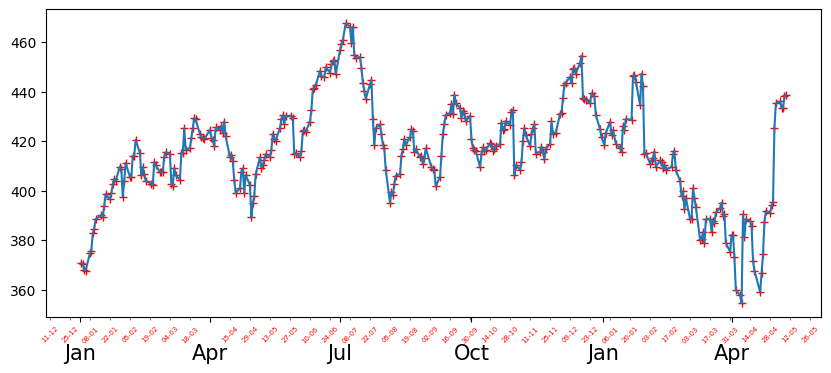

In [225]:
import matplotlib.dates as mdates

fig, axs = plt.subplots(1, figsize = (10,4))

# 2 ways of plotting : 
axs.plot(MSFT.index,
            MSFT['Price Close'],
            'r+', # Format : red with +
            scalex = True, # Scale Parameters determine if the view is adapted to data 
            scaley = True
            )

# For labelled data, can plot using column names if we set data = MSFT
axs.plot(MSFT.index,
            'Price Close',
            data = MSFT)

from matplotlib.dates import MonthLocator, DateFormatter, WeekdayLocator

# To make the x-tick labels say the Month and Year use MonthLocator() on the x axis
axs.xaxis.set_major_locator(
    mdates.MonthLocator([1,4,7,10]) # Quarterly
    ) 

# To format into e.g., YYYY-Mon
axs.xaxis.set_major_formatter(
    DateFormatter('%b')
)

from matplotlib.dates import MO, TU, WE, TH, FR, SA, SU
# To set the every week as the minor tick on x axis

minor_locator = mdates.WeekdayLocator(byweekday = MO, # TU for Tuesday etc...
                                      interval = 14  # Most take interval arguement
                                      )

axs.xaxis.set_minor_locator(minor_locator)
axs.xaxis.set_minor_formatter(DateFormatter('%d-%m'))

# Format the ticks
axs.tick_params(axis = 'x', which = 'major', rotation = 0, labelsize = 15, pad = 15)
axs.tick_params(axis = 'x', which = 'minor', rotation = 45, labelsize = 5,colors = 'red') 

# Can also use autofmt_xdate() to make sure rotation and alignment is good
# fig.autofmt_xdate()


#### AutoLocator() and AutoFormatter()

Don't use autoformatter() if you want a specific format for labels on x axis

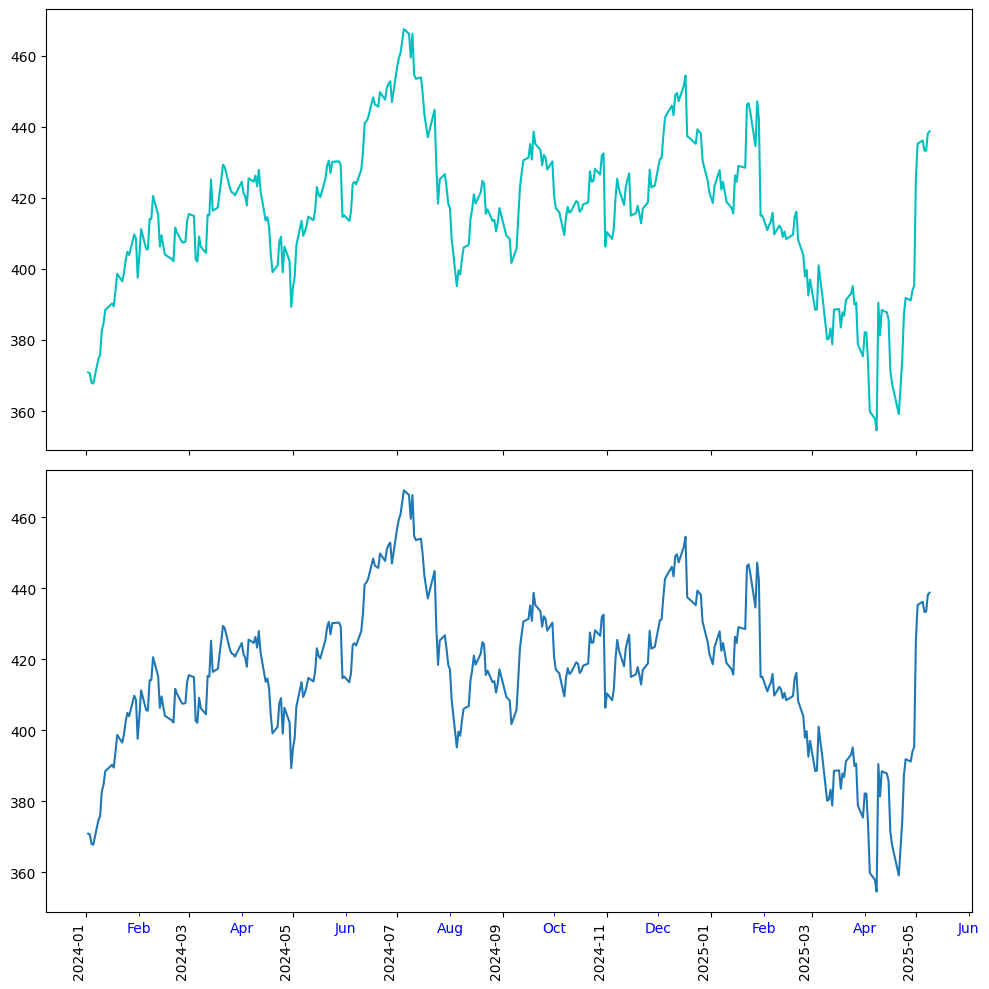

In [ ]:
fig, ax = plt.subplots(2,1 , figsize = (10,10))

ax[0].plot(MSFT, color = 'c')
ax[1].plot('Price Close', data = MSFT)

# AutoDateLocator inspects the span of the data then picks approporiate interval (e.g., quarterly)
autolocator = AutoDateLocator()
ax[0].xaxis.set_major_locator(autolocator)

# Autoformatter picks matching string format
autoformatter = AutoDateFormatter(autolocator)
ax[0].xaxis.set_major_formatter(autoformatter)

# Set Minor axis
minor_locator = mdates.WeekdayLocator(byweekday=MO)
ax[1].xaxis.set_minor_locator(MonthLocator())
ax[1].xaxis.set_minor_formatter(DateFormatter('%b'))
ax[1].tick_params(axis = 'x',
                  which = 'minor',
                  length = 3,
                  colors = 'blue')

# Use auto format on the figure object - this function only alters major labels
fig.autofmt_xdate(rotation = 90)


plt.tight_layout()

### Plotting Multiple Time Series

In [175]:

df_3_returns = pd.concat([MSFT, TSLA,NVDA], axis = 1, names = ['Stock', 'Drop This'], keys = ['MSFT', 'TSLA', 'NVDA'])
print(df_3_returns.head(3))

df_3_returns.columns = df_3_returns.columns.get_level_values(level = 'Stock')
print('\n\nDropped the bad level \n:', df_3_returns.head(3))

Stock             MSFT        TSLA        NVDA
Drop This  Price Close Price Close Price Close
Date                                          
2024-01-02      370.87      248.42      48.168
2024-01-03      370.60      238.45      47.569
2024-01-04      367.94      237.93      47.998


Dropped the bad level 
: Stock         MSFT    TSLA    NVDA
Date                              
2024-01-02  370.87  248.42  48.168
2024-01-03  370.60  238.45  47.569
2024-01-04  367.94  237.93  47.998


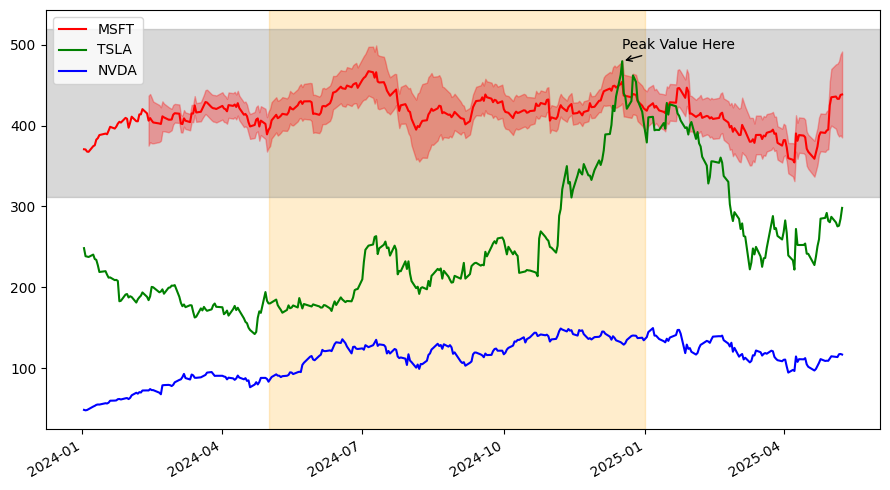

In [242]:
fig, ax = plt.subplots(figsize = (9,5))

df_3_returns_names = ['MSFT', 'TSLA', 'NVDA']
colors = ['red', 'green', 'blue']


# To plot lines with particular color use a zip for loop
for stock, color in zip(df_3_returns_names, colors):
    ax.plot(df_3_returns[stock],
            color = color, 
            label = stock)

ax.legend()
locator = AutoDateLocator(minticks = 4, maxticks = 8)
formatter = AutoDateFormatter(locator)

# Format X axis easily
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

fig.autofmt_xdate()

# Shaded Region between a start time and end time
Start_time = pd.Timestamp('2024-05')
End_time = pd.Timestamp('2025-01')
# Use axvspan()
ax.axvspan(Start_time,
           End_time,
           color = 'orange',
           alpha = 0.2
            )
# Shaded region between price points (can only take a band of values e.g., scalars)
Floor = MSFT.mean().sum() * 0.75
Ceiling = MSFT.mean().sum() * 1.25
# Use axhspan()
ax.axhspan(Floor, Ceiling, color = 'gray', alpha = 0.3)

# To shade around a series (2 standard deviations) - use fill_between()
Floor_MSFT = df_3_returns['MSFT'] - 2 * df_3_returns['MSFT'].rolling(30).std() # Define values
Ceiling_MSFT = df_3_returns['MSFT'] + 2 * df_3_returns['MSFT'].rolling(30).std()

ax.fill_between(df_3_returns.index, # Index must be aligned 
                y1 = Floor_MSFT,
                y2 = Ceiling_MSFT,
                color = 'red',
                alpha = 0.3)


# Annotation of Tesla e.g., at the date of max value
peak_date = df_3_returns['TSLA'].idxmax()
peak_value = df_3_returns['TSLA'].max()

ax.annotate(
    'Peak Value Here', # Text for Annotation
    xy = (peak_date, peak_value), # Location of the annotation
    xytext = (peak_date, peak_value + 15), # Location of the text
    arrowprops = {'arrowstyle' : "->", # Properties of the annotation arrow
                    'color' : 'black'}
    )

plt.tight_layout()

# Seaborn

Assumes data is in a Dataframe, plots are done from the dataframe

In [268]:
titanic_df = pd.read_csv(r'C:\Users\Phillip\Desktop\Python\Python Notebooks (Mine)\Datasets\test_titanic.csv')

In [270]:
sns.load_dataset("iris")

URLError: <urlopen error [WinError 10054] An existing connection was forcibly closed by the remote host>